### CSC478 Final Project: MovieLens General Analysis
### Jun Tae Son |  Yuchen Wu | Tzu Hao Peng

In [1]:
#Loading the required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#Read data
rating_cols = ['user id','movie_id','rating','timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=rating_cols)

item_cols = ['movie_id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance ','Sci-Fi','Thriller','War' ,'Western']
movies=pd.read_csv('u.item',sep='|',names=item_cols)

user_cols = ['user id','age','gender','occupation','zip code']
users = pd.read_csv('u.user', sep='|', names=user_cols)

genre_cols= ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance ','Sci-Fi','Thriller','War' ,'Western']
genre = pd.read_csv('u.genre', sep='|')

In [3]:
ratings.head()

,user id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movies.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
movies.dtypes

movie_id                int64
movie title            object
release date           object
video release date    float64
IMDb URL               object
unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Childrens               int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
dtype: object

In [6]:
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
users.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [8]:
genre.head()

,unknown,0
0,Action,1
1,Adventure,2
2,Animation,3
3,Children's,4
4,Comedy,5


##### a. Mean ratings

In [9]:
df = pd.merge(pd.merge(movies, ratings), users)

In [10]:
ratings_total_users = df.groupby('movie title').size()
print(ratings_total_users.head())

movie title
'Til There Was You (1997)      9
1-900 (1994)                   5
101 Dalmatians (1996)        109
12 Angry Men (1957)          125
187 (1997)                    41
dtype: int64


In [11]:
ratings_mean = (df.groupby('movie title'))['movie title','rating'].mean()
print(ratings_mean.head())

                             rating
movie title                        
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390


In [12]:
result = pd.concat([ratings_total_users, ratings_mean],axis=1)

In [13]:
result.columns = ['number of users', 'average rating']

In [14]:
result.head() #The table shows how many people rated the movie and the average rating score

,number of users,average rating
movie title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390


In [15]:
result['average rating'].describe()

count    1664.000000
mean        3.077018
std         0.780418
min         1.000000
25%         2.665094
50%         3.162132
75%         3.651808
max         5.000000
Name: average rating, dtype: float64

##### The average movie rating score is 3.077

##### b. Top-rated movies

In [16]:
result.sort_values('average rating',ascending=False).head(15)

,number of users,average rating
movie title,,
They Made Me a Criminal (1939),1,5.000
Marlene Dietrich: Shadow and Light (1996),1,5.000
"Saint of Fort Washington, The (1993)",2,5.000
Someone Else's America (1995),1,5.000
Star Kid (1997),3,5.000
"Great Day in Harlem, A (1994)",1,5.000
Aiqing wansui (1994),1,5.000
Santa with Muscles (1996),2,5.000
Prefontaine (1997),3,5.000


##### The movies have top rated scores are not popular movies. In fact, there are only few users rated them. 

##### c. Most-rated movies

In [17]:
ratings_total_users = pd.DataFrame({'movie title':ratings_total_users.index,
'number of users': ratings_total_users.values})
ratings_mean['movie title'] = ratings_mean.index

In [18]:
final = pd.merge(ratings_mean, ratings_total_users).sort_values(by = 'number of users',
ascending= False)
print(final.describe())

            rating  number of users
count  1664.000000      1664.000000
mean      3.077018        60.096154
std       0.780418        80.956484
min       1.000000         1.000000
25%       2.665094         7.000000
50%       3.162132        27.000000
75%       3.651808        80.250000
max       5.000000       583.000000


In [19]:
print(final.head())

        rating                movie title  number of users
1398  4.358491           Star Wars (1977)              583
333   3.803536             Contact (1997)              509
498   4.155512               Fargo (1996)              508
1234  4.007890  Return of the Jedi (1983)              507
860   3.156701           Liar Liar (1997)              485


##### The most rated movie is Star Wars. There are 583 users rated this movie and average rating is 4.358

##### d. The rating characteristics in different movie genres

In [20]:
#Genres
movie_ratings=pd.merge(movies,ratings)

In [21]:
genre_ratings=pd.melt(movie_ratings[['rating']+genre_cols],id_vars=['rating'],var_name='genre')

In [22]:
genre_ratings=genre_ratings[genre_ratings['value']==1][['rating','genre']]
genre_mean = pd.pivot_table(genre_ratings, columns = ['genre'],values = ['rating'], aggfunc = np.mean)
genre_mean

genre,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,unknown
rating,3.480245,3.503527,3.576699,3.353244,3.394073,3.632278,3.672823,3.687379,3.215237,3.921523,3.290389,3.521397,3.638132,3.621705,3.560723,3.509007,3.815812,3.613269,3.2


##### e. Movie rating characteristics of different user clusters

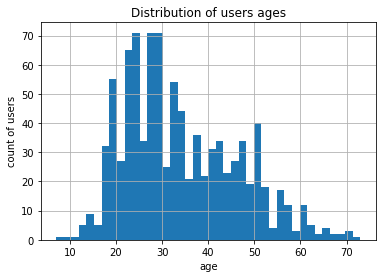

In [23]:
#User age
users.age.plot(kind='hist',bins=40,grid=True)
plt.title("Distribution of users ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [24]:
agebins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.age, range(0, 81, 10), right=False, labels=agebins)
df[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


In [25]:
df.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [26]:
most_100 = df.groupby('movie_id').size().sort_values(ascending=False)[:100]

In [27]:
df.set_index('movie_id', inplace=True)

In [29]:
movie_by_age = df.loc[most_100.index].groupby(['movie title', 'age_group'])
movie_by_age.rating.mean().head(15)

movie title                   age_group
2001: A Space Odyssey (1968)  0-9          5.000000
                              10-19        4.100000
                              20-29        3.924731
                              30-39        3.887500
                              40-49        4.093023
                              50-59        4.000000
                              60-69        4.285714
Air Force One (1997)          10-19        3.647059
                              20-29        3.666667
                              30-39        3.570000
                              40-49        3.555556
                              50-59        3.750000
                              60-69        3.666667
                              70-79        3.666667
Aladdin (1992)                10-19        3.840000
Name: rating, dtype: float64

In [30]:
movie_by_age.rating.mean().unstack(1).fillna(0)

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
movie title,,,,,,,,
2001: A Space Odyssey (1968),5.0,4.100000,3.924731,3.887500,4.093023,4.000000,4.285714,0.000000
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Aladdin (1992),0.0,3.840000,3.820000,3.847458,3.769231,3.571429,3.500000,0.000000
Alien (1979),0.0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0.0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
Amadeus (1984),0.0,4.250000,4.067308,4.236842,4.081633,4.230769,4.750000,5.000000
Apocalypse Now (1979),0.0,4.400000,4.050633,4.132353,3.700000,4.187500,4.142857,5.000000
Apollo 13 (1995),4.0,3.954545,3.845455,4.064935,3.822222,4.187500,3.750000,4.000000
Babe (1995),0.0,3.909091,3.894737,4.032258,4.060606,4.150000,4.600000,3.000000


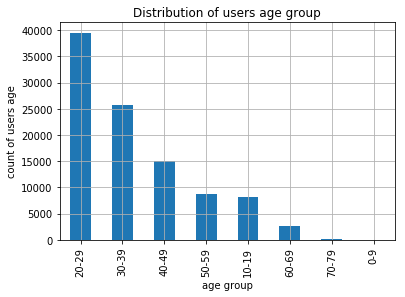

In [31]:
df["age_group"].value_counts().plot(kind='bar',grid=True)
plt.title("Distribution of users age group")
plt.ylabel('count of users age')
plt.xlabel('age group');

#### Most movies are rated by age group 20-29, the average mean is 3.46, which is the lowest rating score compare to other age group. The highest rating score is 3.76 in the age group 0-9, however, they rated movies the least.

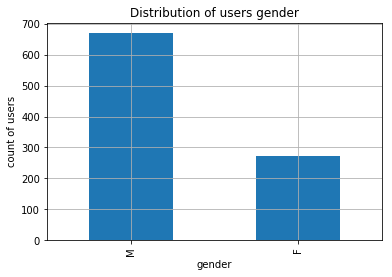

In [32]:
#User gender
users["gender"].value_counts().plot(kind='bar',grid=True)
plt.title("Distribution of users gender")
plt.ylabel('count of users')
plt.xlabel('gender');

In [33]:
movie_ratings_user=pd.merge(movie_ratings,users)

In [54]:
movie_ratings_user.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Thriller,War,Western,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,308,5,887736696,60,M,retired,95076


In [47]:
pivoted = movie_ratings_user.pivot_table(columns=['gender'],values='rating')
pivoted.head()

gender,F,M
rating,3.531507,3.529289


In [53]:
pivoted = movie_ratings_user.pivot_table(index=['movie_id', 'movie title'], columns=['gender'],values='rating')
pivoted.head()

,gender,F,M
movie_id,movie title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [35]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,gender,F,M,diff
movie_id,movie title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [36]:
pivoted.reset_index('movie_id', inplace=True)

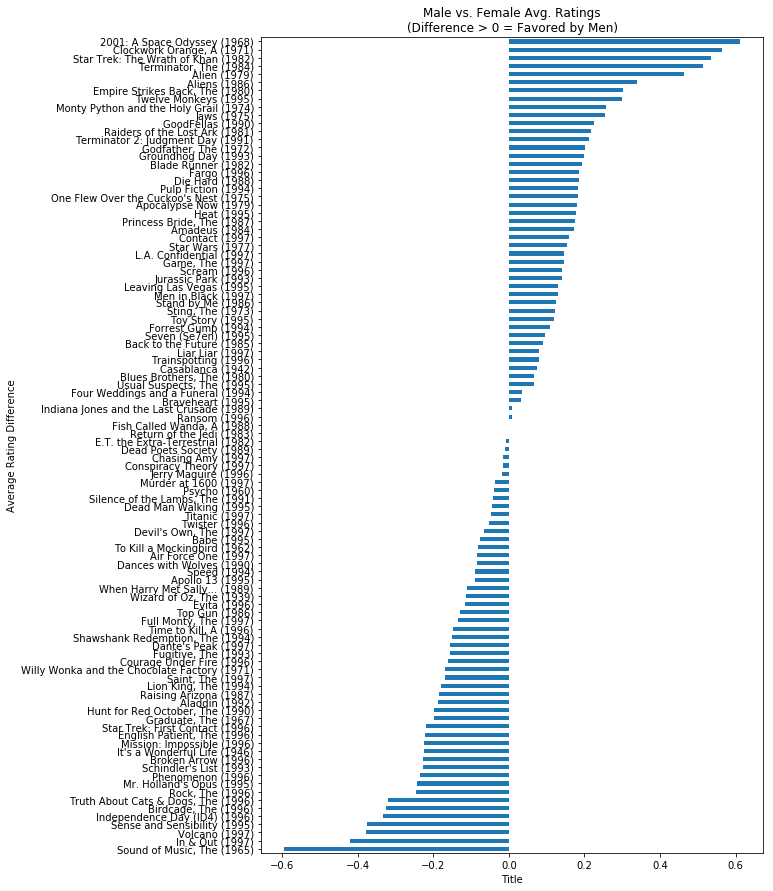

In [38]:
disagreements = pivoted[pivoted.movie_id.isin(most_100.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Average Rating Difference')
plt.xlabel('Title');

#### From the differenciate plot of the male and female average rating score, movie 2001: A Space Odyssey is favored by male the most, and The Sound of Music is favored by female the most. 

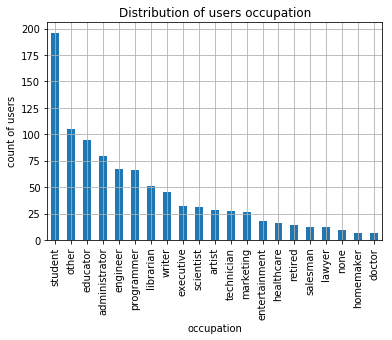

In [39]:
#Occupation
users["occupation"].value_counts().plot(kind='bar',grid=True)
plt.title("Distribution of users occupation")
plt.ylabel('count of users')
plt.xlabel('occupation');

In [40]:
pivoted = movie_ratings_user.pivot_table(index=['movie_id', 'movie title'],columns=['occupation'],values='rating')

In [41]:
pivoted.describe().T

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
administrator,1107.0,3.412088,0.880773,1.0,3.000000,3.555556,4.000000,5.0
artist,823.0,3.420518,1.020039,1.0,3.000000,3.500000,4.000000,5.0
doctor,409.0,3.631418,0.944817,1.0,3.000000,4.000000,4.000000,5.0
educator,1212.0,3.337547,0.903627,1.0,3.000000,3.500000,4.000000,5.0
engineer,1065.0,3.189595,0.850766,1.0,2.800000,3.272727,3.800000,5.0
entertainment,829.0,3.280427,1.005993,1.0,2.800000,3.333333,4.000000,5.0
executive,1019.0,2.921150,1.198505,1.0,2.000000,3.000000,4.000000,5.0
healthcare,1270.0,2.554436,1.079672,1.0,2.000000,2.666667,3.333333,5.0
homemaker,187.0,3.216221,1.083557,1.0,2.500000,3.000000,4.000000,5.0


#### From the occupation plot, most of the rating users are students, doctors are the least. The rating mean for people who don't have an occupation is the highest (3.748),  people in the healthcare field are having the lowest rating mean (2.55).